Import libraries

In [20]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

Read Csv file

In [16]:
df = pd.read_csv(r'C:\Users\User\Desktop\AI\Machine learning\diabetes.csv')

The df.head() function is a method in the Pandas library used to display the first 5 rows (by default) of a DataFrame object. This method is very useful for viewing the first few rows when analyzing large datasets.

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The df.info() function in Pandas provides a concise summary of a DataFrame, giving information about its structure, such as the number of rows and columns, column data types, memory usage, and non-null value counts.



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The df.isnull().sum() function is a concise way to identify and count the number of missing (null or NaN) values in each column of a Pandas DataFrame.

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The mean() function in Pandas is used to calculate the average (arithmetic mean) of numeric data along a specified axis in a DataFrame or Series.

In [21]:
df['Glucose'].mean()

np.float64(120.89453125)

The describe() function in Pandas is used to generate descriptive statistics of a DataFrame or Series. It provides a quick summary of the key statistical measures for numeric or categorical data.

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


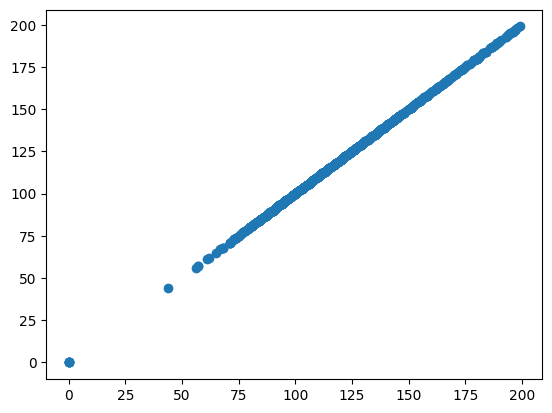

In [24]:
plt.scatter(df.Glucose,df.Glucose)

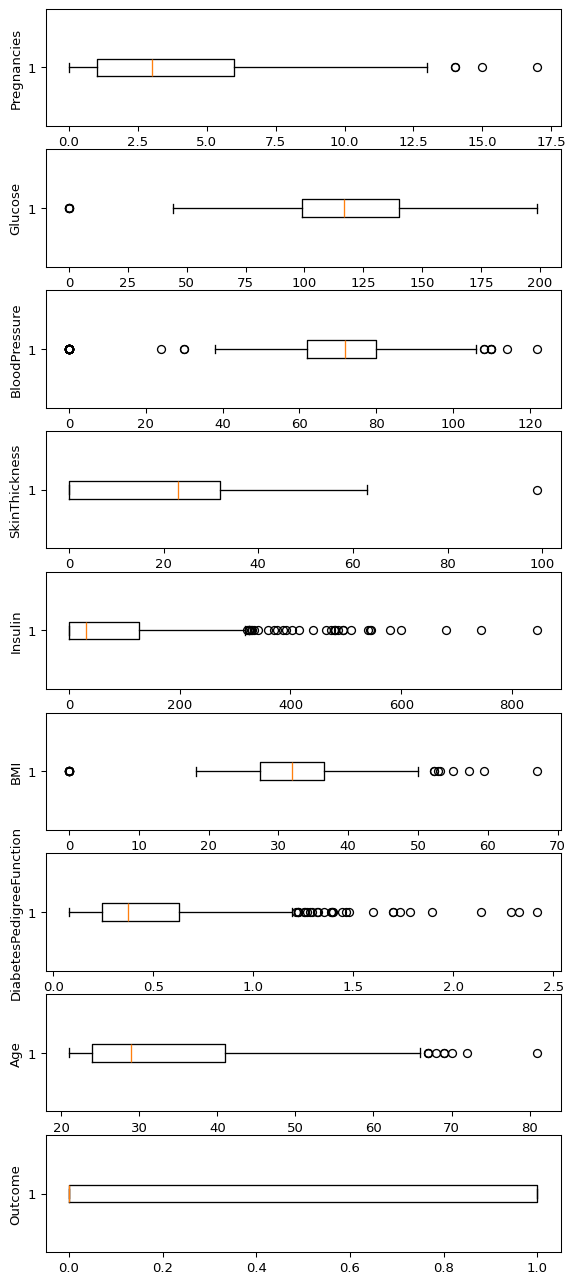

In [28]:
fig,axs = plt.subplots(9,1, dpi=95, figsize=(7,17))
i=0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

The shape attribute in Pandas and NumPy is used to determine the dimensions of a DataFrame, Series, or an array. It returns a tuple representing the number of rows and columns for 2D structures, or the dimensions for higher-dimensional arrays.

In [31]:
df.shape

(768, 9)

In [32]:
clean_data.shape

(592, 9)

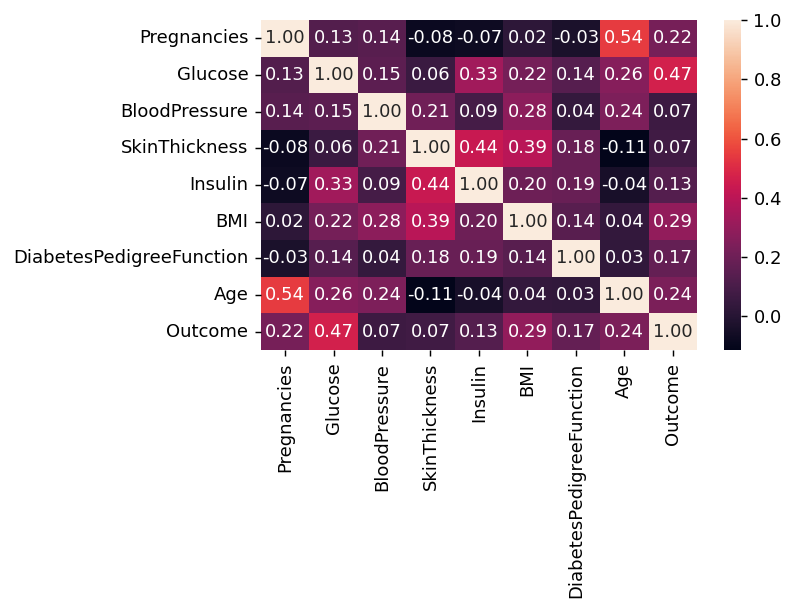

In [34]:
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True,fmt= '.2f')
plt.tight_layout()
plt.show()

In [36]:
corr['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [38]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

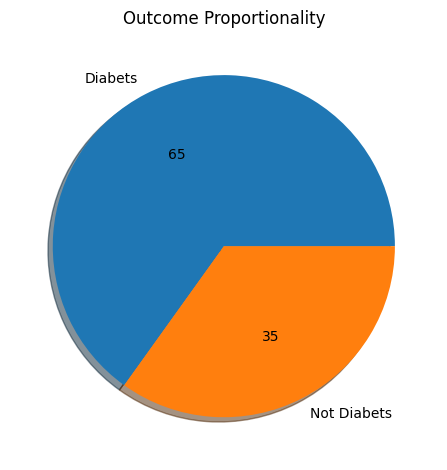

In [39]:
plt.pie(df.Outcome.value_counts(),
        labels= ['Diabets','Not Diabets'],
        autopct='%.f',shadow=True)
plt.title('Outcome Proportionality')
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(columns=['Outcome'])
Y = df.Outcome

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

<Axes: >

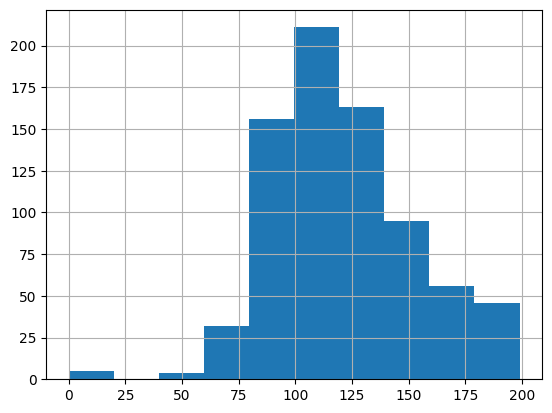

In [ ]:
X.Glucose.hist()